In [83]:
# Importación de bibliotecas necesarias
import pandas as pd  # Para el manejo de datos en formato CSV
import numpy as np   # Para operaciones matriciales
import os       # Para operaciones relacionadas con el sistema de archivos

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  # Para graficar los datos
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('analisis de datos adriana/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#validate missing values
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

In [12]:
df[['BMI', 'heartRate','sysBP','diaBP','TenYearCHD']].head()


,BMI,heartRate,sysBP,diaBP,TenYearCHD
0,26.97,80.0,106.0,70.0,0
1,28.73,95.0,121.0,81.0,0
2,25.34,75.0,127.5,80.0,0
3,28.58,65.0,150.0,95.0,1
4,23.10,85.0,130.0,84.0,0


In [25]:
x_train = np.array(df['BMI']).reshape((-1,1))
y_train = np.array(df['TenYearCHD'])

model= LogisticRegression()
model.fit(x_train, y_train)

b =model.intercept_
w =model.coef_
print(f"interceptor b: {b}")
print(f"pendiente w: {w}")

interceptor b: [-2.97393686]
pendiente w: [[0.04810294]]


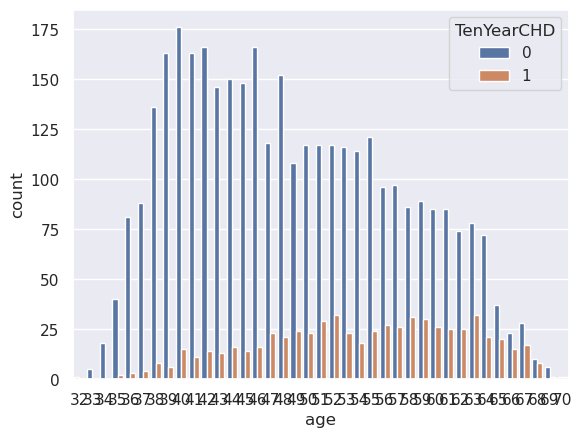

In [73]:
fig, ax = plt.subplots()
sns.countplot(x='age',hue='TenYearCHD', data=df, ax=ax)
plt.show()

In [75]:
X = df[["age","diabetes","sysBP","diaBP","BMI","heartRate","glucose"]]
y = df[["TenYearCHD"]]

In [124]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

X.mean()
X.std()

1.0

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

LR = LogisticRegression().fit(X_train, y_train.values.ravel())

y_pred = LR.predict(X_test)
np.set_printoptions(suppress=True)

##predicion de los datos de prueba
print(y_pred)

[0 0 0 ... 0 0 0]


In [128]:
## Precision
accuracy_score(y_test, y_pred)

0.8367924528301887

In [130]:
##Probabilidad
y_pred_prob = LR.predict_proba(X_test)

y_pred_prob

array([[0.90617144, 0.09382856],
       [0.77292091, 0.22707909],
       [0.52264167, 0.47735833],
       ...,
       [0.87484046, 0.12515954],
       [0.7686404 , 0.2313596 ],
       [0.93611187, 0.06388813]])

In [116]:
#import matplotlib as mpl
#from mpl_toolkits.mplot3d import Axes3D
#x= df_3d.columns
#y= df_3d.index
#X,Y = np.meshgrid(x,y)
#Z = df_3d

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(X,Y,Z)